# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulana Muhammad
- **Email:** maulanamuhammad2000@gmail.com
- **ID Dicoding:** maoelana

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda di setiap jam sepanjang tahun?
- Apa pengaruh hari kerja dan hari libur terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset\day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("Bike-sharing-dataset\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.duplicated().sum()

0

In [9]:
hour_df.duplicated().sum()

0

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
day_df.drop_duplicates(inplace=True)

In [13]:
hour_df.drop_duplicates(inplace=True)

In [14]:
day_df.dropna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [15]:
hour_df.dropna()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


check windspeed outlier

In [16]:
def plot_boxplot(data, column, title, xlabel, ax, palette='viridis'):
    sns.boxplot(x=data[column], ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')

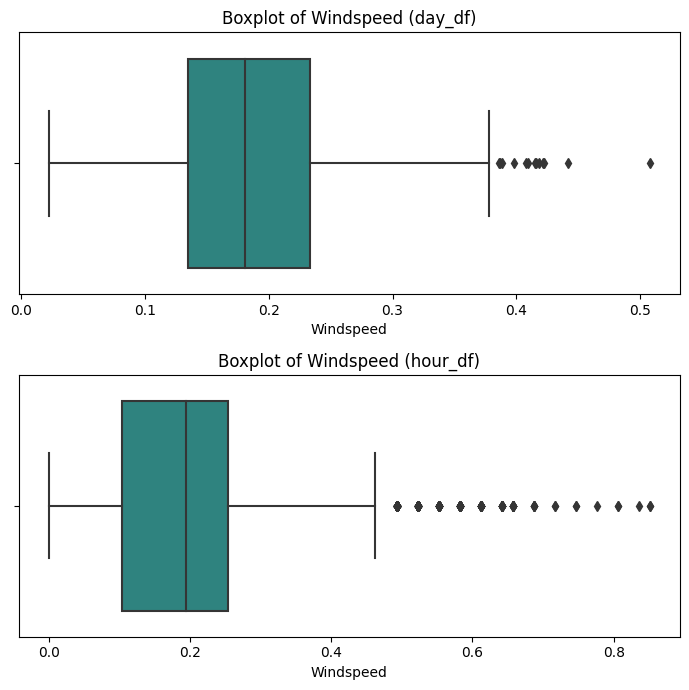

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
plot_boxplot(day_df, 'windspeed', 'Boxplot of Windspeed (day_df)', 'Windspeed', axes[0])
plot_boxplot(hour_df, 'windspeed', 'Boxplot of Windspeed (hour_df)', 'Windspeed', axes[1])
plt.tight_layout()
plt.show()

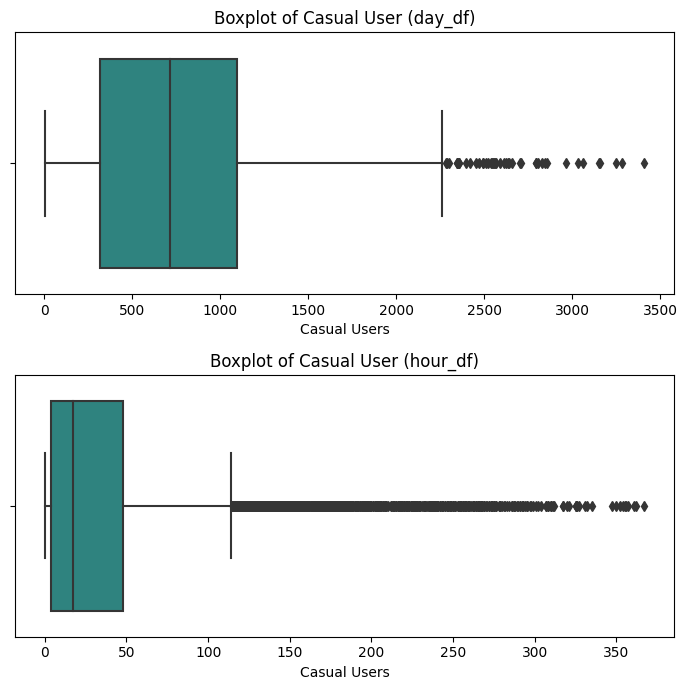

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
plot_boxplot(day_df, 'casual', 'Boxplot of Casual User (day_df)', 'Casual Users', axes[0])
plot_boxplot(hour_df, 'casual', 'Boxplot of Casual User (hour_df)', 'Casual Users', axes[1])
plt.tight_layout()
plt.show()

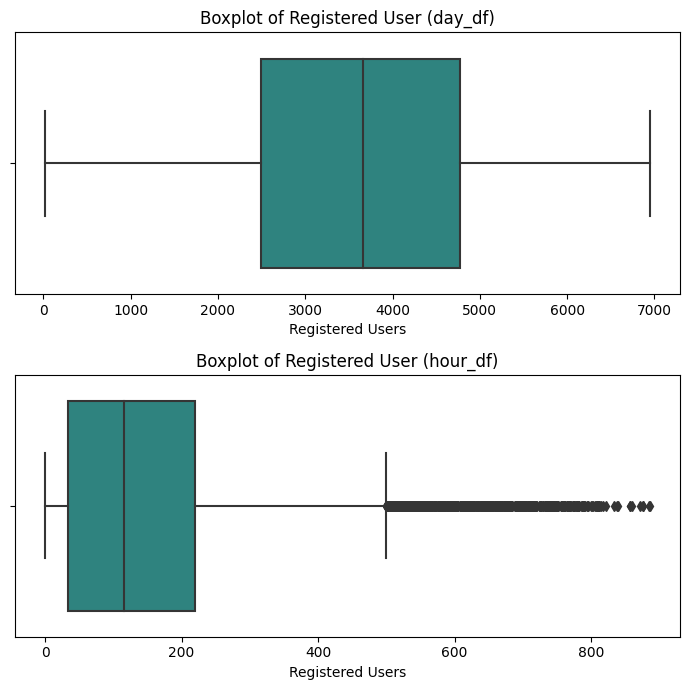

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
plot_boxplot(day_df, 'registered', 'Boxplot of Registered User (day_df)', 'Registered Users', axes[0])
plot_boxplot(hour_df, 'registered', 'Boxplot of Registered User (hour_df)', 'Registered Users', axes[1])
plt.tight_layout()
plt.show()

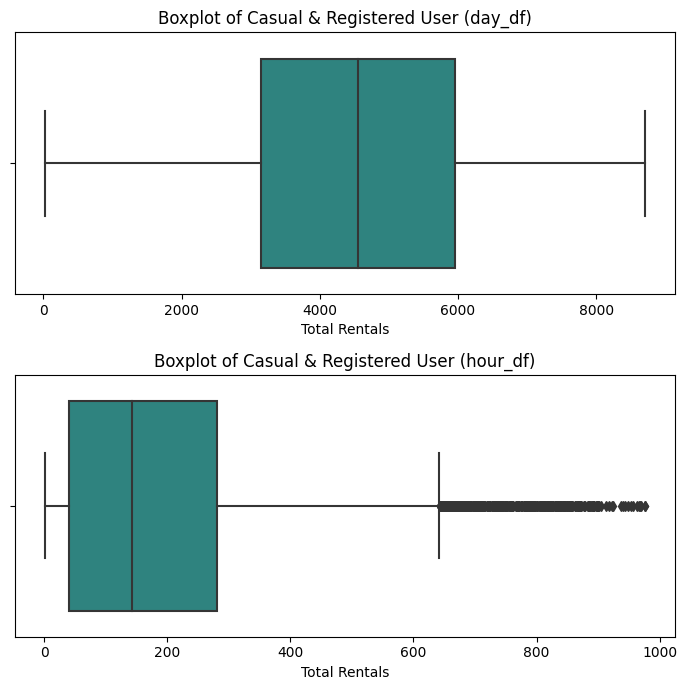

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
plot_boxplot(day_df, 'cnt', 'Boxplot of Casual & Registered User (day_df)', 'Total Rentals', axes[0])
plot_boxplot(hour_df, 'cnt', 'Boxplot of Casual & Registered User (hour_df)', 'Total Rentals', axes[1])
plt.tight_layout()
plt.show()

In [ ]:
def replace_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    lower_than = df[column_name] < minimum
    more_than = df[column_name] > maximum

    df.loc[lower_than, column_name] = minimum
    df.loc[more_than, column_name] = maximum

In [ ]:
replace_outliers(day_df, 'windspeed')
replace_outliers(hour_df, 'windspeed')
replace_outliers(day_df, 'casual')
replace_outliers(hour_df, 'casual')
replace_outliers(hour_df, 'registered')
replace_outliers(hour_df, 'cnt')

In [ ]:
day_df['sum_check'] = day_df['casual'] + day_df['registered']
day_df['mismatch'] = day_df['sum_check'] != day_df['cnt']

if day_df['mismatch'].any():
    total_mismatch = day_df['mismatch'].sum()
    print("Total mismatch:", total_mismatch)
    print(day_df[day_df['mismatch']])

    day_df = day_df[~day_df['mismatch']]

Total mismatch: 44
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
148      149  2011-05-29       2   0     5        0        0           0   
183      184  2011-07-03       3   0     7        0        0           0   
184      185  2011-07-04       3   0     7        1        1           0   
196      197  2011-07-16       3   0     7        0        6           0   
246      247  2011-09-04       3   0     9        0        0           0   
281      282  2011-10-09       4   0    10        0        0           0   
441      442  2012-03-17       1   1     3        0        6           0   
447      448  2012-03-23       2   1     3        0        5           1   
455      456  2012-03-31       2   1     3        0        6           0   
456      457  2012-04-01       2   1     4        0        0           0   
462      463  2012-04-07       2   1     4        0        6           0   
469      470  2012-04-14       2   1     4        0        6         

In [ ]:
hour_df['sum_check'] = hour_df['casual'] + hour_df['registered']
hour_df['mismatch'] = hour_df['sum_check'] != hour_df['cnt']

if hour_df['mismatch'].any():
    total_mismatch = hour_df['mismatch'].sum()
    print("Total mismatch:", total_mismatch)
    print(hour_df[hour_df['mismatch']])
    
    hour_df = hour_df[~hour_df['mismatch']]

Total mismatch: 1821
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
1633      1634  2011-03-13       1   0     3  14        0        0   
1634      1635  2011-03-13       1   0     3  15        0        0   
1635      1636  2011-03-13       1   0     3  16        0        0   
1771      1772  2011-03-19       1   0     3  12        0        6   
1772      1773  2011-03-19       1   0     3  13        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17063    17064  2012-12-18       4   1    12  18        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   
17086    17087  2012-12-19       4   1    12  17        0        3   
17087    17088  2012-12-19       4   1    12  18        0        3   
17101    17102  2012-12-20       4   1    12   8        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
1633            0           1  0.46  0.4545  0.41     0.2985     1

## Exploratory Data Analysis (EDA)

### Explore ...

Text(0.5, 1.0, 'Correlation Matrix')

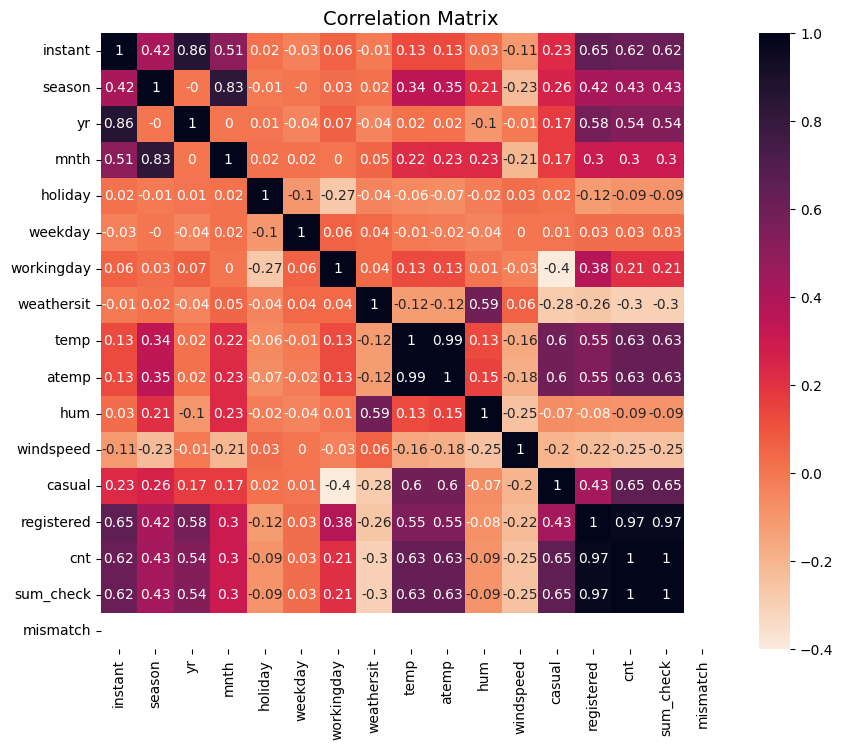

In [ ]:
plt.figure(figsize = (10,8))
correlation_matrix = day_df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix", size = 14)

Text(0.5, 1.0, 'Correlation Matrix')

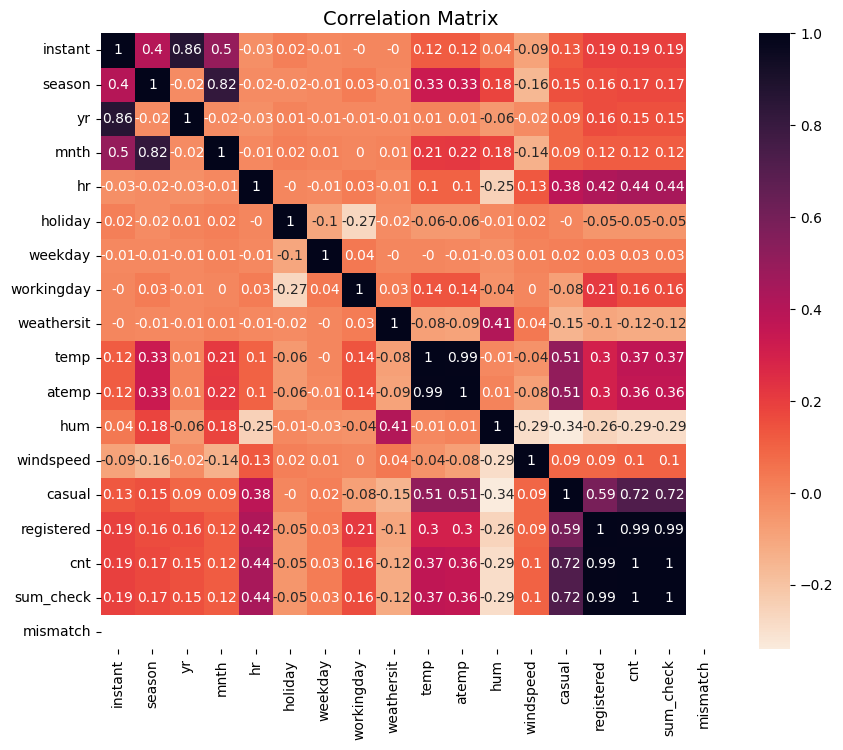

In [ ]:
plt.figure(figsize = (10,8))
correlation_matrix = hour_df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix", size = 14)

Pada kedua correlation matrix tersebut dapat diambil insight sebagai berikut :
- season memiliki korelasi yang cukup tinggi dengan mnth ini menendakan kalau season benar-benar diukur menggunakan skala mnth
- temp dan atemp memiliki korelasi yang hampir bersinggungan karena disini temp merupakan tempratur yang benar dan atemp merupakan tempratur yang dirasakan dapat disimpulkan bahwa tempratur dan temratur yang dirasakan sama.
- registered memiliki korelasi yang tinggi terhadap cnt sehingga dapat dikatakan kalau registered user lebih mendominasi dibandingkan casual user, karena cnt merupakan hasil penjumlahan dari casual dan registered user.

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sum_check,mismatch
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687
unique,NaN,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687
mean,357.339156,NaN,2.486172,0.477438,6.512373,0.026201,2.965066,0.726346,1.403202,0.487475,0.467232,0.628917,0.190441,732.010189,3608.756914,4340.767103,4340.767103,NaN
std,212.261294,NaN,1.128493,0.499855,3.517065,0.159849,1.932219,0.446158,0.549732,0.184392,0.164292,0.143854,0.076463,521.433756,1580.356697,1866.258997,1866.258997,NaN
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,22.000000,NaN
25%,173.500000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.327917,0.326064,0.520000,0.134952,295.000000,2452.500000,3002.000000,3002.000000,NaN
50%,350.000000,NaN,2.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.475833,0.466525,0.626667,0.180967,674.000000,3603.000000,4381.000000,4381.000000,NaN
75%,543.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.650416,0.604811,0.733334,0.234051,1026.500000,4686.000000,5583.500000,5583.500000,NaN


Informasi yang diperoleh berdasarkan statistik yang dari day_df

- Data cnt terdistribusi dengan rata-rata 4340 dan standar devias 1866, ini menunjukkan adanya beberapa variablitias dalam jumlah total penyewaan.
- Data pada feature season menjukkan bahwa data diambil selama 4 musim yang berbeda dengan distribusi yang hampir merata.
- Feature workingday dan holiday menunjukkan proporsi hari kerja dan libur.
- Feature weathersit, temp, atemp, hum dan windspeed memberikan informasi tentang kondisi cuaca yang mungkin mempengaruhi jumlah penyewaan sepeda.
- Tidak ada mismatch karena pada feature mismatch menunjukkan tidak ada kesalahan dalam penjumlahan casual + registered untuk mendapatkan cnt.
- Feature yr, mnth, weekday memberikan informasi tentang bagaimana data bervariasi sepanjang tahun, bulan dan hari dalam seminggu.

Distribusi cnt berdasarkan ye dan mnth

Rata-rata Penyewaan per Tahun:
Tahun 2011: 3373.95
Tahun 2012: 5398.96

Rata-rata Penyewaan per Bulan:
Bulan April: 4272.36
Bulan August: 5608.42
Bulan December: 3403.81
Bulan February: 2655.30
Bulan January: 2176.34
Bulan July: 5474.12
Bulan June: 5548.19
Bulan March: 3499.78
Bulan May: 5148.02
Bulan November: 4203.03
Bulan October: 5050.59
Bulan September: 5525.06


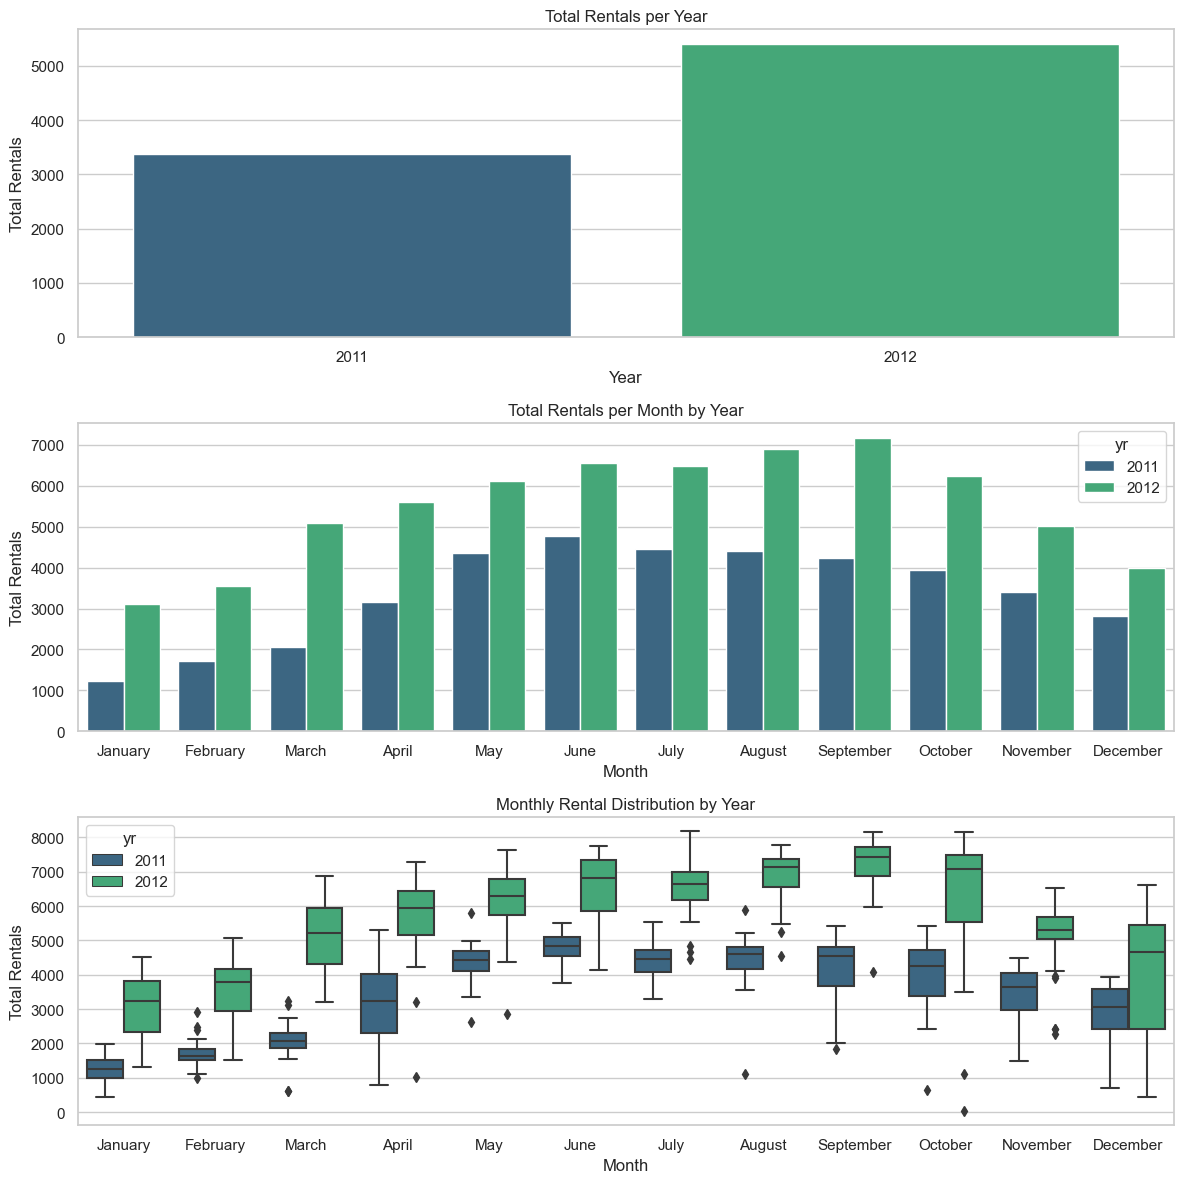

In [ ]:
def plot_rental_distribution(data):
    # Setting the Seaborn theme
    sns.set_theme(style="whitegrid")  # You can choose from 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

    # Replace year codes with actual years
    data['yr'] = data['yr'].replace({0: 2011, 1: 2012})

    # Replace month numbers with month names
    month_names = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    data['mnth'] = data['mnth'].replace(month_names)

    # Calculate summary statistics
    year_summary = data.groupby('yr')['cnt'].mean()
    month_summary = data.groupby('mnth')['cnt'].mean()

    # Print summary statistics
    print("Rata-rata Penyewaan per Tahun:")
    for year, avg_rent in year_summary.items():
        print(f"Tahun {year}: {avg_rent:.2f}")
    
    print("\nRata-rata Penyewaan per Bulan:")
    for month, avg_rent in month_summary.items():
        print(f"Bulan {month}: {avg_rent:.2f}")

    # Plotting
    plt.figure(figsize=(12, 12))

    # Barplot for yearly rental counts
    plt.subplot(3, 1, 1)
    sns.barplot(x='yr', y='cnt', data=data, ci=None, palette='viridis')
    plt.title('Total Rentals per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Rentals')

    # Barplot for monthly rental counts
    plt.subplot(3, 1, 2)
    sns.barplot(x='mnth', y='cnt', hue='yr', data=data, ci=None, palette='viridis')
    plt.title('Total Rentals per Month by Year')
    plt.xlabel('Month')
    plt.ylabel('Total Rentals')

    # Boxplot for monthly rental distribution
    plt.subplot(3, 1, 3)
    sns.boxplot(x='mnth', y='cnt', hue='yr', data=data, palette='viridis')
    plt.title('Monthly Rental Distribution by Year')
    plt.xlabel('Month')
    plt.ylabel('Total Rentals')

    plt.tight_layout()
    plt.show()

# Usage example with your DataFrame
plot_rental_distribution(day_df)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2